In [ ]:
!pip install pandas rdkit useful_rdkit_utils sklearn numpy opentsne seaborn

In [31]:
import pandas as pd
from rdkit import Chem
import useful_rdkit_utils as uru
from sklearn.decomposition import PCA
import numpy as np
from openTSNE import TSNE
import seaborn as sns

Read drugs a SMILES file containing marketed drugs

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/PatWalters/notebook_share/main/chembl_drugs.smi",sep=" ",names=["SMILES","Name"])

Add RDKit molecules and fingerprints

In [33]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)
df['fp'] = df.mol.apply(uru.mol2numpy_fp)

We're going to do a TSNE plot of the fingerprints.  TSNE doesn't work well with very high dimensional data.  We'll use PCA to reduce the data to 50 dimensions. 

In [50]:
pca = PCA(n_components=50)
pc = pca.fit_transform(np.stack(df.fp))

Now calculate the TSNE embedding.  We'll use OpenTSNE because it allows us to reuse the embedding on a new dataset. 

In [41]:
tsne = TSNE(n_components=2, n_jobs=-1)
embedding = tsne.fit(pc)
df[["TSNE_x","TSNE_y"]] = embedding.transform(pc)

Plot the embedded molecules. 

<AxesSubplot:xlabel='TSNE_x', ylabel='TSNE_y'>

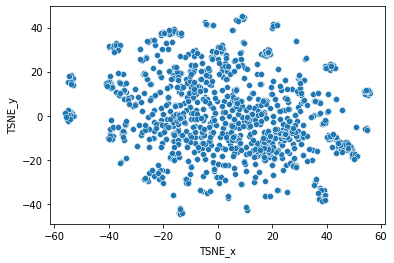

In [42]:
sns.scatterplot(x="TSNE_x",y="TSNE_y",data=df)

Now that we've created the embeding space, we can map arbitrary molecules into this space.  These molecule could have been read from an external file.  To make things simple, we'll just randomly select 30 molecules from the ChEMBL drug set adn calculate fingerprints for these molecules. 

In [23]:
sample_smiles = df.sample(30).SMILES.values
sample_mols = [Chem.MolFromSmiles(x) for x in sample_smiles]
sample_fp = [uru.mol2numpy_fp(x) for x in sample_mols]

Use the PCA from above to reduce the dimensionality of the fingerprints, then apply the TSNE embedding. 

In [46]:
sample_pc = pca.transform(np.stack(sample_fp))
sample_embed = embedding.transform(sample_pc)
sample_tsne_x = sample_embed[:,0]
sample_tsne_y = sample_embed[:,1]

Plot the new molecules. 

Text(0, 0.5, 'TSNE_y')

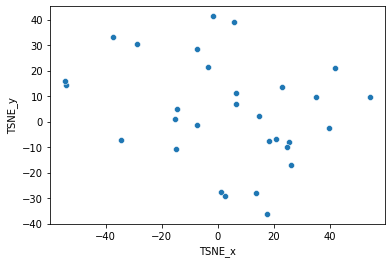

In [49]:
sample_ax = sns.scatterplot(x=sample_tsne_x, y=sample_tsne_y)
sample_ax.set_xlabel("TSNE_x")
sample_ax.set_ylabel("TSNE_y")